In [2]:
import selenium
from selenium import webdriver
import pandas as pd
import time
import re

Q1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [3]:
driver= webdriver.Chrome("chromedriver.exe")

In [62]:
# Getting url
url= "https://www.amazon.in/"
driver.get(url)

In [63]:
prod= input("Enter the product name : \n")
search=driver.find_element_by_id("twotabsearchtextbox")
search.send_keys(prod)

Enter the product name : 
guitar


In [64]:
search_btn=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_btn.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [65]:
# Scraping urls for each url of product
time.sleep(5)
urls=[]
for i in range(1,3):
    url_tags=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
    for j in url_tags:
        urls.append(j.get_attribute("href"))
    nxt_button=driver.find_elements_by_xpath("//li[@class='a-last']")     #scraping the list of buttons from the page
    try:
        driver.get(nxt_button.get_attribute('href'))       #getting the link from the list for next page
    except:
        ("-")
print(urls)
print(len(urls))
print(nxt_button)

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0991693PKTLP5CX5W2L&url=%2FMedellin-MED-BLU-C-Linden-Acoustic-Guitar%2Fdp%2FB07NBMWHJW%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%3D8-1-spons%26psc%3D1%26smid%3DAM04Z7MH4HSDD&qualifier=1627469775&id=8557941832463111&widgetName=sp_atf', 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A02345373MFNVAER3DQNT&url=%2FKadence-Acoustica-Ash-Wood-Equlizer%2Fdp%2FB0757H5P13%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%3D8-2-spons%26psc%3D1%26smid%3DAM04Z7MH4HSDD&qualifier=1627469775&id=8557941832463111&widgetName=sp_atf', 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0928654VYD9HPIWAKBZ&url=%2FKadence-Frontier-Natural-Acoustic-Foldable%2Fdp%2FB01CJJGJ04%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%3D

In [66]:
brand=[]
product_name=[]
ratings=[]
numb_ratings=[]
price=[]
prod_url=[]
Return=[]
exp_delivery=[]
availability=[]
other=[]

In [67]:
for i in range(len(urls)):
    driver.get(urls[i])
    time.sleep(2)
    prod_url.append(urls[i])
    try:
        brand_tag= driver.find_element_by_xpath("//td[@class='a-size-base prodDetAttrValue']")
        brand.append(brand_tag.text)
    except:
        brand.append("-")
    try:
        name= driver.find_element_by_id("productTitle")
        product_name.append(name.text)
    except:
        product_name.append("-")
    try:
        rate_tag= driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
        ratings.append(rate_tag.text)
    except:
        ratings.append("-")
    try:
        num_rate= driver.find_element_by_xpath("//div[@class='a-row a-spacing-medium averageStarRatingNumerical']")
        numb_ratings.append(num_rate.text)
    except:
        numb_ratings.append("-")
    try:
        price_tag= driver.find_element_by_id("priceblock_ourprice")
        price.append(price_tag.text)
    except:
        price.append("-")
    try:
        retrn= driver.find_element_by_xpath("//a[2][@class='a-size-small a-link-normal a-text-normal']")
        Return.append(retrn.text)
    except:
        Return.append("-")
    try:
        deliver= driver.find_element_by_id("ddmDeliveryMessage")
        exp_delivery.append(deliver.text)
    except:
        exp_delivery.append("-")
    try:
        avail= driver.find_element_by_id("availability")
        availability.append(avail.text)
    except:
        availability.append("-")
    try:
        tag= driver.find_element_by_xpath("//div[@id='productDescription']//p")
        other.append(tag.text)
    except:
        other.append("-")
prod_url

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0991693PKTLP5CX5W2L&url=%2FMedellin-MED-BLU-C-Linden-Acoustic-Guitar%2Fdp%2FB07NBMWHJW%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%3D8-1-spons%26psc%3D1%26smid%3DAM04Z7MH4HSDD&qualifier=1627469775&id=8557941832463111&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A02345373MFNVAER3DQNT&url=%2FKadence-Acoustica-Ash-Wood-Equlizer%2Fdp%2FB0757H5P13%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%3D8-2-spons%26psc%3D1%26smid%3DAM04Z7MH4HSDD&qualifier=1627469775&id=8557941832463111&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0928654VYD9HPIWAKBZ&url=%2FKadence-Frontier-Natural-Acoustic-Foldable%2Fdp%2FB01CJJGJ04%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitar%26qid%3D1627469775%26sr%

In [71]:
print(Return)

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']


In [69]:
## Creating dataframe
prod_details=pd.DataFrame()
prod_details["Brand"]=brand
prod_details["Product_Name"]=product_name
prod_details["Ratings"]=ratings
prod_details["NumberOfRatings"]=numb_ratings
prod_details["Availability"]=availability
prod_details["Expected_Delivery"]=exp_delivery
prod_details["Return"]=Return
prod_details["Price"]=price
prod_details["Other_Details"]=other
prod_details.head()

,Brand,Product_Name,Ratings,NumberOfRatings,Availability,Expected_Delivery,Return,Price,Other_Details
0,Medellin,Medellin MED-BLU-C Linden Wood Acoustic Guitar,3.9 out of 5,476 global ratings,In stock.,"FREE delivery: Sunday, Aug 1 Details",-,"₹2,399.00",-
1,Kadence,Kadence Acoustica Series Semi Acoustic Ash Woo...,3.9 out of 5,610 global ratings,In stock.,"FREE delivery: Sunday, Aug 1 Details",-,"₹7,199.00",-
2,Kadence,"Kadence Frontier Series, Natural Acoustic Guit...",3.8 out of 5,71 global ratings,In stock.,"FREE delivery: Sunday, Aug 1 Details",-,"₹5,999.00",-
3,Guitar Bro,GUITAR BRO - COMBO (Blue Acoustic Guitar for B...,3.7 out of 5,27 global ratings,In stock.,FREE delivery: Aug 3 - 6 Details\nFastest deli...,-,"₹6,499.00",-
4,98 x 40 x 10 cm; 2.06 Kilograms,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",3.9 out of 5,"11,490 global ratings",In stock.,"FREE delivery: Friday, July 30 Details\nFastes...",-,"₹2,649.00",


In [73]:
# Saving File
prod_details.to_csv("Product_Details")
driver.close()

3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScPtz2ZoMJHYnZgrOoX4fWicItWpJT0savJQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVEttZoEZw0MRpJ-uDyr6QiqzbIJyRR7ofNA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROYH-uaHxJxZllD4i4p-a6Jx_gDHTAudnBxQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRenGZHB84JcIXCX7jMQUkZt7GFpp8mK1x7RA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT68b0O5wgNnMvg2hrPVjD4cRADRiFNcmXHvQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7kkivkhNYl7J-zrplcR4yzU2SWnbokp6Gxg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQDr9ULjOquuPdJ2V--OpedrVVI29pJJP80g&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAFt0xHiff3fl4uAzBm9kkAa36Rnq2-i1lHQ&usq
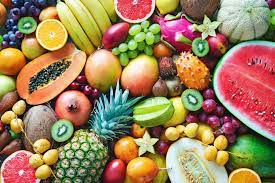
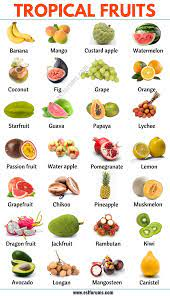
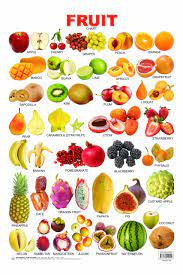
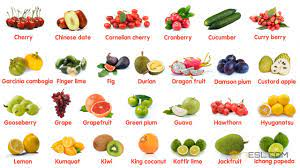
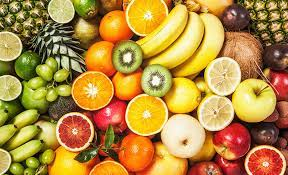
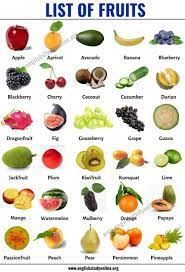
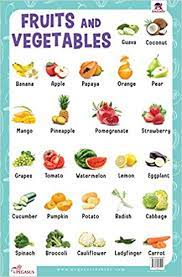
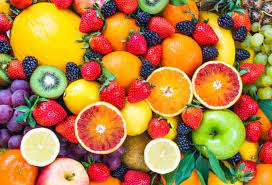
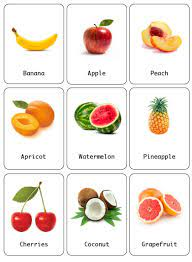
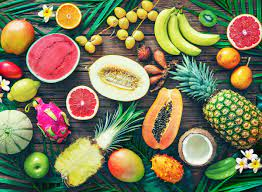
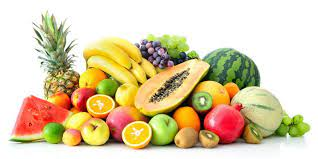
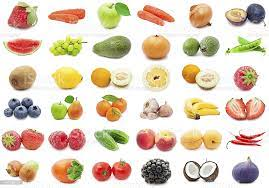
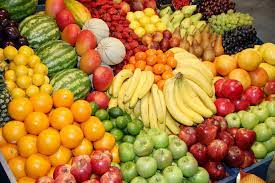
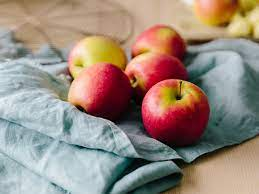
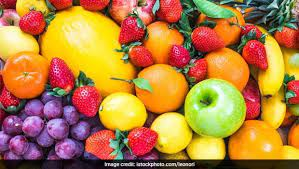
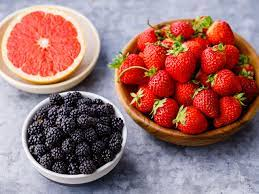
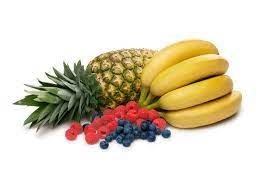
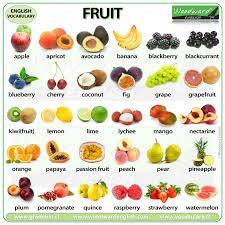
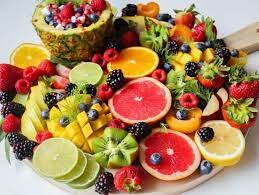
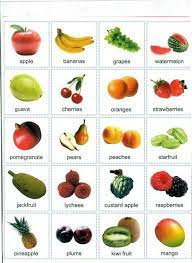

In [2]:
driver=webdriver.Chrome("chromedriver.exe")

url='https://images.google.com/'
driver.get(url)
driver.maximize_window()

search_prod=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_prod.clear()
search_prod.send_keys('fruits')

search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()


scroll_pause_time = 5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(scroll_pause_time)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        # If heights are the same it will exit the function
        break
    last_height = new_height

fruimg=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")

fru_src=[]
for i in fruimg[:100]:
    fru_src.append(i.get_attribute("src"))

print(fru_src)
print(len(fru_src))
driver.close()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_CzmXhj1J-lGs5kRvVGref4_lqg1qRQ4l7g&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSvY9YRbYhrkz4WzPBt6CAUahP8YoeB1kHkXw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTL8es92nEfJZrPYTja1BR9UumhnPnF3ObsWQ&usqp=CAU', None, None, None, 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu5mwXZ9iCFwuuXxVXai-VSUBnSrfA5FSqTg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQn94mjwfKc2LlgNtN9zy5QKaghdPKDmu4Lzw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_O13qbjKt5a9bDZxydTj-m7R5F8UONq_efw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiyRiZ_loY8PCKaKBH-j4Q
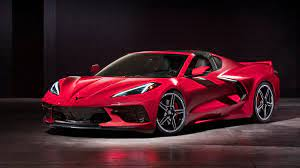
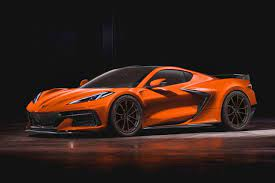
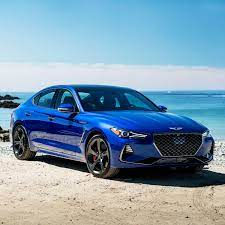
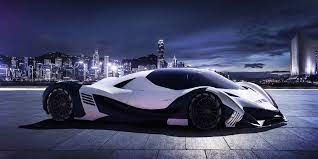
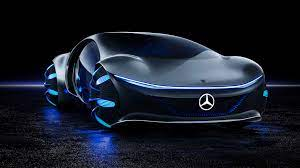
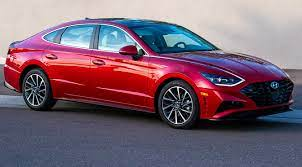
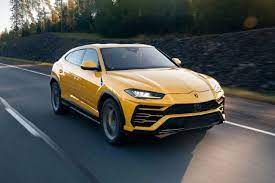
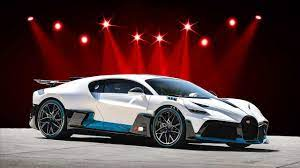
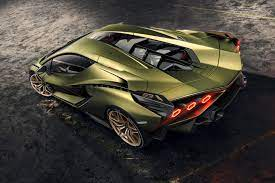
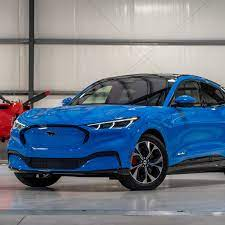
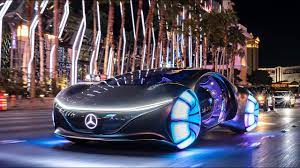
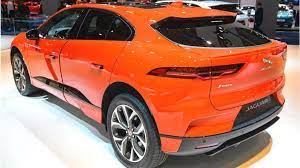
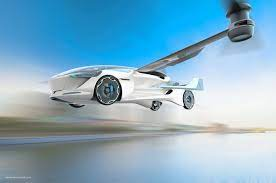
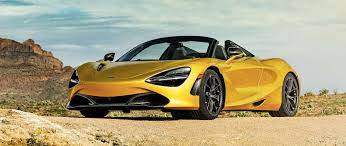
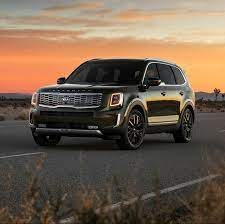
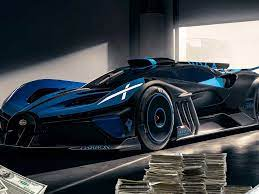
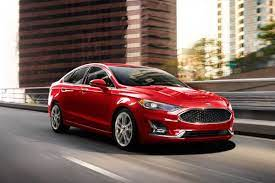
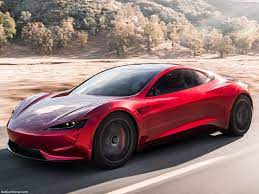
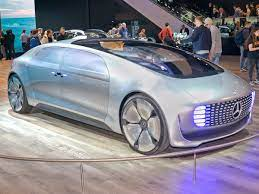
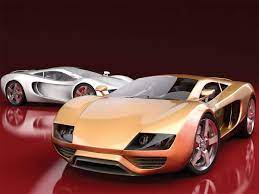

In [3]:
driver=webdriver.Chrome("chromedriver.exe")

url='https://images.google.com/'
driver.get(url)
driver.maximize_window()

search_prod=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_prod.clear()
search_prod.send_keys('cars')

search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()


scroll_pause_time = 5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(scroll_pause_time)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        # If heights are the same it will exit the function
        break
    last_height = new_height

carimg=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")

car_src=[]
for i in carimg[:100]:
    car_src.append(i.get_attribute("src"))

print(car_src)
print(len(car_src))
driver.close()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTba5qkPbfxaExGGfEhcujsY708WyfHopDV8w&usqp=CAU', None, None, None, None, None, None, 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThKWzCEIz4Qlh_hyRMcifUF8AUU-dK_N7iRg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrqPSV1NlpA6A-mUXfKlgbC6ci9VWcwgg1CA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQulizjoCvcETV2mLWm9WcZ0mlsl-MjY0B7RQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPRh_bHRkCuP3PSyEYC_gw8mrKONs57eeBXw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtsQ2491eHCVnkW_r0GEUSuFi9lLiuPml37Q&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWwQAsLQGePm2peRX-jSUlmXt48OT8arllUQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFueOb66mkdjk_FrOsnYVpzw7U3AwkhUOB5g&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VX
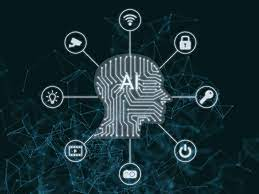
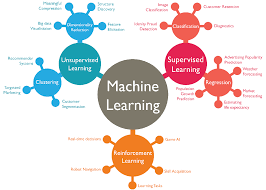
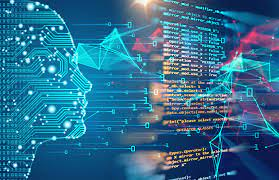
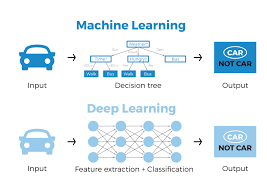
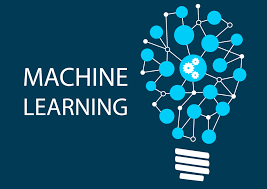
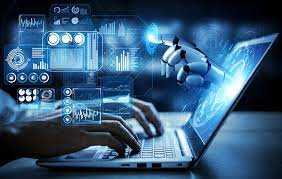
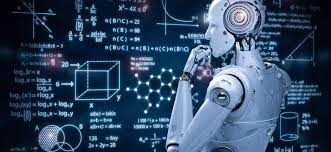
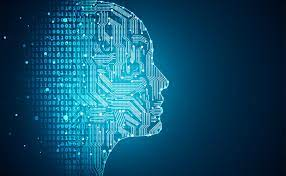
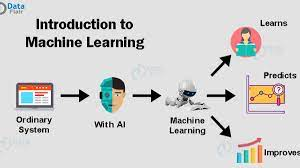
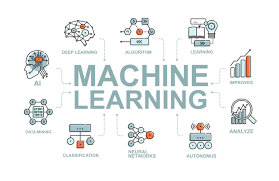
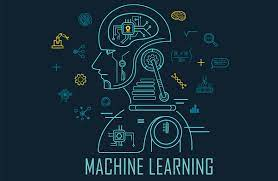
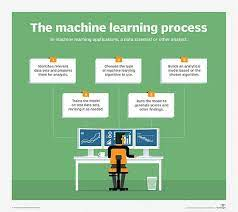
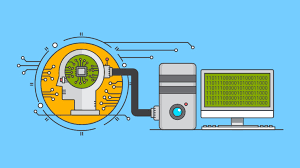
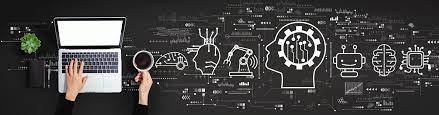
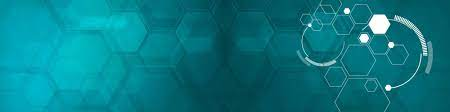
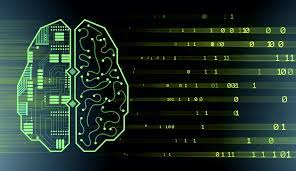
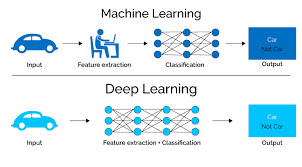
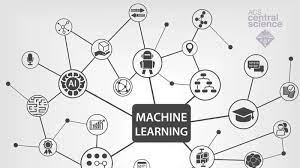
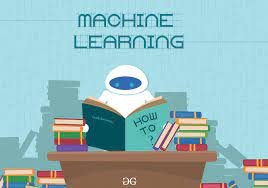
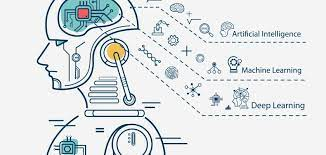

In [4]:
driver=webdriver.Chrome("chromedriver.exe")

url='https://images.google.com/'
driver.get(url)
driver.maximize_window()

search_prod=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_prod.clear()
search_prod.send_keys('Machine Learning')

search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()


scroll_pause_time = 5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(scroll_pause_time)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        # If heights are the same it will exit the function
        break
    last_height = new_height

mlimg=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")

ml_src=[]
for i in mlimg[:100]:
    ml_src.append(i.get_attribute("src"))

print(ml_src)
print(len(ml_src))
driver.close()

In [5]:
ImageLinks=pd.DataFrame({})
ImageLinks['Fruit Image Link']=fru_src
ImageLinks['Cars Image Link']=car_src
ImageLinks['ML Image Link']=ml_src
ImageLinks.index += 1
ImageLinks

,Fruit Image Link,Cars Image Link,ML Image Link
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
99,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [10]:
driver=webdriver.Chrome("chromedriver.exe")

url='https://www.flipkart.com/'
driver.get(url)
driver.maximize_window()

pop_btn=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
pop_btn.click()

search_prod=driver.find_element_by_xpath("//input[@class='_3704LK']")
search_prod.clear()
search_prod.send_keys('smartphone')

search_btn=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_btn.click()

time.sleep(2)
driver.implicitly_wait(5)
brandurl=driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a")

urls=[]
brand=[]
colour=[]
ram=[]
rom=[]
pcam=[]
scam=[]
dsize=[]
dres=[]
proc=[]
procor=[]
bat=[]
price=[]


for i in brandurl:
    urls.append(i.get_attribute("href"))

for i in urls:
    driver.get(i)
    brandname=driver.find_element_by_xpath("//span[@class='B_NuCI']")
    brand.append(brandname.text)
    read_btn=driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
    read_btn.click()
    
    try:
        colr=driver.find_element_by_xpath("//*[text()='Color']/following-sibling::td")
        colour.append(colr.text)
    except:
        colour.append("-")
    
    try:
        rm=driver.find_element_by_xpath("//*[text()='RAM']/following-sibling::td")
        ram.append(rm.text)
    except:
        ram.append("-")
        
    try:
        roms=driver.find_element_by_xpath("//*[text()='Internal Storage']/following-sibling::td")
        rom.append(roms.text)
    except:
        rom.append("-")
        
    try:
        pc=driver.find_element_by_xpath("//*[text()='Primary Camera']/following-sibling::td")
        pcam.append(pc.text)
    except:
        pcam.append("-")    

    try:
        sc=driver.find_element_by_xpath("//*[text()='Secondary Camera']/following-sibling::td")
        scam.append(sc.text)
    except:
        scam.append("-")
    
    try:
        ds=driver.find_element_by_xpath("//*[text()='Display Size']/following-sibling::td")
        dsize.append(ds.text)
    except:
        dsize.append("-")
     
    try:
        dr=driver.find_element_by_xpath("//*[text()='Resolution']/following-sibling::td")
        dres.append(dr.text)
    except:
        dres.append("-")

    try:
        pro=driver.find_element_by_xpath("//*[text()='Processor Type']/following-sibling::td")
        proc.append(pro.text)
    except:
        proc.append("-")

    try:
        prc=driver.find_element_by_xpath("//*[text()='Processor Core']/following-sibling::td")
        procor.append(prc.text)
    except:
        procor.append("-")

    try:
        bt=driver.find_element_by_xpath("//*[text()='Battery Capacity']/following-sibling::td")
        bat.append(bt.text)
    except:
        bat.append("-")

    try:
        rate=driver.find_element_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
        price.append(rate.text.replace('₹',''))
    except:
        price.append("-")

print(brand)
print(colour)
print(ram)
print(rom)
print(pcam)
print(scam)
print(dsize)
print(dres)
print(proc)
print(procor)
print(bat)
print(price)


driver.close()

['POCO M3 (Power Black, 64 GB)  (4 GB RAM)', 'realme C20 (Cool Blue, 32 GB)  (2 GB RAM)', 'realme C20 (Cool Grey, 32 GB)  (2 GB RAM)', 'OPPO Reno6 Pro 5G (Aurora, 256 GB)  (12 GB RAM)', 'REDMI 9i (Nature Green, 64 GB)  (4 GB RAM)', 'POCO M3 (Power Black, 64 GB)  (6 GB RAM)', 'REDMI 9 Prime (Matte Black, 64 GB)  (4 GB RAM)', 'I Kall K 320 (Purple, 64 GB)  (4 GB RAM)', 'realme Narzo 30 5G (Racing Silver, 128 GB)  (6 GB RAM)', 'REDMI 9i (Midnight Black, 64 GB)  (4 GB RAM)', 'realme C21 (Cross Blue, 32 GB)  (3 GB RAM)', 'OPPO Reno6 5G (Aurora, 128 GB)  (8 GB RAM)', 'realme C21 (Cross Blue, 64 GB)  (4 GB RAM)', 'realme C21 (Cross Black, 64 GB)  (4 GB RAM)', 'realme C21 (Cross Black, 32 GB)  (3 GB RAM)', 'I Kall K260 (Purple, 16 GB)  (2 GB RAM)', 'realme Narzo 30 5G (Racing Blue, 128 GB)  (6 GB RAM)', 'REDMI 9 Power (Blazing Blue, 64 GB)  (4 GB RAM)', 'REDMI Note 9 (Pebble Grey, 64 GB)  (4 GB RAM)', 'I Kall K200 (Blue, 16 GB)  (2 GB RAM)', 'realme Narzo 30 (Racing Silver, 64 GB)  (4 GB RAM)'

In [11]:
proddata=pd.DataFrame({})
proddata['Product Name']=brand
proddata['Colour']=colour
proddata['RAM']=ram
proddata['Internal Storage']=rom
proddata['Primary Camera']=pcam
proddata['Secondry Camera']=scam
proddata['Display Size']=dsize
proddata['Display Resolution']=dres
proddata['Processor']=proc
proddata['Processor Cores']=procor
proddata['Battery']=bat
proddata['Price']=price
proddata['Product URL']=urls
proddata

,Product Name,Colour,RAM,Internal Storage,Primary Camera,Secondry Camera,Display Size,Display Resolution,Processor,Processor Cores,Battery,Price,Product URL
0,"POCO M3 (Power Black, 64 GB) (4 GB RAM)",Power Black,4 GB,64 GB,48MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"10,499",https://www.flipkart.com/poco-m3-power-black-6...
1,"realme C20 (Cool Blue, 32 GB) (2 GB RAM)",Cool Blue,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,16.51 cm (6.5 inch),1600 x 720 Pixels,MediaTek Helio G35,Octa Core,5000 mAh,"6,999",https://www.flipkart.com/realme-c20-cool-blue-...
2,"realme C20 (Cool Grey, 32 GB) (2 GB RAM)",Cool Grey,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,16.51 cm (6.5 inch),1600 x 720 Pixels,MediaTek Helio G35,Octa Core,5000 mAh,"6,999",https://www.flipkart.com/realme-c20-cool-grey-...
3,"OPPO Reno6 Pro 5G (Aurora, 256 GB) (12 GB RAM)",Aurora,12 GB,256 GB,64MP + 8MP + 2MP + 2MP,32MP Front Camera,16.64 cm (6.55 inch),2400 x 1080 Pixels,MediaTek Dimensity 1200,Octa Core,4500 mAh,"39,990",https://www.flipkart.com/oppo-reno6-pro-5g-aur...
4,"REDMI 9i (Nature Green, 64 GB) (4 GB RAM)",Nature Green,4 GB,64 GB,13MP Rear Camera,5MP Front Camera,16.59 cm (6.53 inch),1600 x 720 Pixels,MediaTek Helio G25,Octa Core,5000 mAh,"8,499",https://www.flipkart.com/redmi-9i-nature-green...
5,"POCO M3 (Power Black, 64 GB) (6 GB RAM)",Power Black,6 GB,64 GB,48MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"11,499",https://www.flipkart.com/poco-m3-power-black-6...
6,"REDMI 9 Prime (Matte Black, 64 GB) (4 GB RAM)",Matte Black,4 GB,64 GB,13MP + 8MP + 5MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,MediaTek Helio G80,Octa Core,5020 mAh,"9,999",https://www.flipkart.com/redmi-9-prime-matte-b...
7,"I Kall K 320 (Purple, 64 GB) (4 GB RAM)",Purple,4 GB,64 GB,13MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),720*1560,-,Quad Core,3600 mAh,"6,499",https://www.flipkart.com/kall-k-320-purple-64-...
8,"realme Narzo 30 5G (Racing Silver, 128 GB) (6...",Racing Silver,6 GB,128 GB,48MP + 2MP + 2MP,16MP Front Camera,16.51 cm (6.5 inch),2400 x 1080 Pixels,MediaTek Dimensity 700 (MT6833),Octa Core,5000 mAh,"15,999",https://www.flipkart.com/realme-narzo-30-5g-ra...
9,"REDMI 9i (Midnight Black, 64 GB) (4 GB RAM)",Midnight Black,4 GB,64 GB,13MP Rear Camera,5MP Front Camera,16.59 cm (6.53 inch),1600 x 720 Pixels,MediaTek Helio G25,Octa Core,5000 mAh,"8,499",https://www.flipkart.com/redmi-9i-midnight-bla...


In [12]:
proddata.to_csv('Flipkart Product Data.csv', index=False)

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [13]:
driver=webdriver.Chrome("chromedriver.exe")

In [14]:
url='https://maps.google.com/'
driver.get(url)
time.sleep(5)
driver.maximize_window()


In [15]:
search_prod=driver.find_element_by_xpath("//input[@id='searchboxinput']")
search_prod.clear()
print("Enter keyword")
keyword=input()
search_prod.send_keys(keyword)

Enter keyword
Delhi


In [16]:
search_btn=driver.find_element_by_xpath("//button[@id='searchbox-searchbutton']")
search_btn.click()

In [20]:
time.sleep(5)
loc=driver.current_url

try:
    found = re.search('/@(.+?)/', loc).group(1)
except AttributeError:
    found = ''

location=found.split(',')
locat=location[:2]
lat=location[0]
lng=location[1]
print("Geocordinates = ",locat)
print("Latitude = ",lat)
print("Longitude = ",lng)


driver.close()

Geocordinates =  ['28.6466772', '76.8130449']
Latitude =  28.6466772
Longitude =  76.8130449


6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in.

In [22]:
driver=webdriver.Chrome("chromedriver.exe")
url= "https://www.trak.in"
driver.get(url)
time.sleep(5)
driver.maximize_window()

In [28]:
try:
    more_btn=driver.find_element_by_xpath("//li[@class='bs-pretty-tabs-container menu-item-has-children menu-item better-anim-fade bsm-leave']")
    more_btn.click()
except:
    pass

btn=driver.find_element_by_xpath("//li[@id='menu-item-51510']/a")
btn.click()

try:
    popbtn=driver.find_element_by_xpth("//*[contains(text(),'close-button')]")
    popbtn.click
except:
    pass
                                       

In [29]:
detail_tags=driver.find_elements_by_xpath("//div[@class='dataTables_wrapper no-footer']")
details=[]
for i in detail_tags:
    details.append(i.text.replace("\n"," "))


In [30]:
details

["Show 10 25 50 100 entries Search: Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD) 1 01/04/2021 BYJU’S Edu-tech Online tutoring Bengaluru Innoven Capital Series F 460,000,000 2 05/04/2021 Meesho E-commerce Online reselling platform Bengaluru SoftBank Vision Fund 2 Series E 300,000,000 3 14/04/2021 Swiggy Online Food Delivery Online Food Delivery Bengaluru Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments Series J 343,000,000 4 07/04/2021 Groww FinTech Investment platform Bengaluru MC Global Edtech, B Capital, Baron, others Series D 83,000,000 5 14/04/2021 Beldara E-commerce Global B2B marketplace Mumbai Hindustan Media Ventures Venture 7,400,000 Showing 1 to 5 of 5 entries PreviousNext",
 "Show 10 25 50 100 entries Search: Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD) 1 04/03/20

In [31]:
driver.close()

7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [32]:
driver=webdriver.Chrome("chromedriver.exe")

url='https://www.digit.in/top-products/best-gaming-laptops-40.html'
driver.get(url)
time.sleep(5)
driver.maximize_window()

try:
    pop_btn=driver.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
    pop_btn.click()
except:
    pass


brand=[]
OS=[]
gpr=[]
rom=[]
dsize=[]
proc=[]
price=[]
wgt=[]
dms=[]

rate=driver.find_elements_by_xpath("//td[@class='smprice']")

for i in rate:
    price.append(i.text)
        
brandname=driver.find_elements_by_xpath("//div[@class='right-container']//h3")

for i in brandname:
    brand.append(i.text)
    
os=driver.find_elements_by_xpath("//td[text()='OS']/following-sibling::td[2]")

for i in os:
    OS.append(i.text)

ds=driver.find_elements_by_xpath("//td[text()='Display']/following-sibling::td[2]")

for i in ds:
    dsize.append(i.text)

pro=driver.find_elements_by_xpath("//td[text()='Processor']/following-sibling::td[2]")

for i in pro:
    proc.append(i.text)

    
roms=driver.find_elements_by_xpath("//td[text()='Memory']/following-sibling::td[2]")

for i in roms:
    rom.append(i.text)

wg=driver.find_elements_by_xpath("//td[text()='Weight']/following-sibling::td[2]")

for i in wg:
    wgt.append(i.text)

dm=driver.find_elements_by_xpath("//td[text()='Dimension']/following-sibling::td[2]")

for i in dm:
    dms.append(i.text)

gp=driver.find_elements_by_xpath("//td[text()='Graphics Processor']/following-sibling::td[2]")

for i in gp:
    gpr.append(i.text)
    
print(brand)
print(OS)
print(dms)
print(rom)
print(gpr)
print(dsize)
print(proc)
print(price)
print(wgt)

driver.close()

['ALIENWARE AREA 51M R2', 'ALIENWARE M15 R3', 'ASUS ROG STRIX SCAR 15', 'ASUS ROG ZEPHYRUS G14', 'LENOVO LEGION 5I', 'ASUS ROG ZEPHYRUS DUO 15', 'ACER ASPIRE 7 GAMING']
['Windows 10 Home', 'Windows 10 Home', 'Windows 10 Home', 'Windows 10 Home', 'Windows 10 Pro', 'Windows 10', 'Windows 10 Home']
['27.65 x 402.6 x 319.14', 'NA', '35.4 x 25.9 x 2.26', '32.5 x 22.1 x 1.8', '363.06 x 259.61 x 23.57', '268.30 x 360.00 x 20.90', '2.29 x 36.3 x 25.4']
['1 TB SSD/16 GBGB DDR4', '1 TB SSD/16 GBGB DDR4', '1 TB SSD/16 GBGB DDR4', '1 TB SSD/16 GBGB DDR4', '1 TB SSD/16 GBGB DDR4', '512 GB SSD/4 GBGB DDR4', '512 GB SSD/8 GBGB DDR4']
['Intel® UHD Graphics 630', 'NA', 'NVIDIA® GeForce RTX™ 3070', 'NVIDIA GeForce RTX 2060', 'NVIDIA® GeForce® GTX 1650 4GB', 'NVIDIA GeForce RTX 2070 Max-Q', 'NVIDIA® GeForce® GTX 1650']
['17.3" (1920 x 1080)', '15.6" (3840 x 2160)', '15.6" (1920 x 1080)', '14" (1920 x 1080)', '15.6" (1920 x 1080)', '15.6" (3840 x 1100)', '15.6" (1920 x 1080)']
['10th Generation Intel® Cor

In [33]:
proddata=pd.DataFrame({})
proddata['Product Name']=brand
proddata['OS']=OS
proddata['Dimension']=dms
proddata['Storage']=rom
proddata['Graphics Processor']=gpr
proddata['Display Size']=dsize
proddata['Processor']=proc
proddata['Price']=price
proddata['Weight']=wgt
proddata

,Product Name,OS,Dimension,Storage,Graphics Processor,Display Size,Processor,Price,Weight
0,ALIENWARE AREA 51M R2,Windows 10 Home,27.65 x 402.6 x 319.14,1 TB SSD/16 GBGB DDR4,Intel® UHD Graphics 630,"17.3"" (1920 x 1080)",10th Generation Intel® Core™ i7-10700 | 2.90 GHz,N/A,4.1
1,ALIENWARE M15 R3,Windows 10 Home,NA,1 TB SSD/16 GBGB DDR4,NA,"15.6"" (3840 x 2160)",10th Generation Intel® Core™ i9-10980HK | NA,₹341990,NA
2,ASUS ROG STRIX SCAR 15,Windows 10 Home,35.4 x 25.9 x 2.26,1 TB SSD/16 GBGB DDR4,NVIDIA® GeForce RTX™ 3070,"15.6"" (1920 x 1080)",AMD Ryzen™ 9 5900HX | 3.3 GHz,N/A,2.30
3,ASUS ROG ZEPHYRUS G14,Windows 10 Home,32.5 x 22.1 x 1.8,1 TB SSD/16 GBGB DDR4,NVIDIA GeForce RTX 2060,"14"" (1920 x 1080)",AMD 3rd Generation Ryzen 9 | 3.3 GHz,₹164990,1.65
4,LENOVO LEGION 5I,Windows 10 Pro,363.06 x 259.61 x 23.57,1 TB SSD/16 GBGB DDR4,NVIDIA® GeForce® GTX 1650 4GB,"15.6"" (1920 x 1080)",10th Generation Intel® Core™ i5-10300H | 2.50 GHz,₹76988,2.3
5,ASUS ROG ZEPHYRUS DUO 15,Windows 10,268.30 x 360.00 x 20.90,512 GB SSD/4 GBGB DDR4,NVIDIA GeForce RTX 2070 Max-Q,"15.6"" (3840 x 1100)",Intel Core i7 10th Gen 10875H | NA,₹185000,2.4
6,ACER ASPIRE 7 GAMING,Windows 10 Home,2.29 x 36.3 x 25.4,512 GB SSD/8 GBGB DDR4,NVIDIA® GeForce® GTX 1650,"15.6"" (1920 x 1080)",AMD Ryzen™ 5-5500U hexa-core | NA,₹67999,2.15


In [34]:
proddata.to_csv('Gaming Laptop.csv', index=False)

8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [36]:
driver=webdriver.Chrome("chromedriver.exe")

url="https://www.forbes.com"
driver.get(url)
time.sleep(5)


In [37]:
exp= driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[1]/button[1]")
exp.click()
btn= driver.find_element_by_xpath("//li[@class='header__channel header__color--centennial-silver header__hoverable']")
btn.click()
btn1= driver.find_element_by_xpath("/html/body/div[1]/header/nav/div[3]/ul/li[1]/div[2]/ul/li[2]/a")
btn1.click()

In [38]:
nm=driver.find_elements_by_xpath("//div[@class='personName']")
name=[]
for i in nm:
    name.append(i.text)

In [39]:
worth= driver.find_elements_by_xpath("//div[@class='netWorth']")
n_worth=[]
for i in worth:
    n_worth.append(i.text)

In [40]:
citz= driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
citzn=[]
for i in citz:
    citzn.append(i.text)

In [41]:
src_t= driver.find_elements_by_xpath("//div[@class='source-column']")
src=[]
for i in src_t:
    src.append(i.text)

In [42]:
rnk_t= driver.find_elements_by_xpath("//div[@class='rank']")
rnk=[]
for i in rnk_t:
    rnk.append(i.text)

In [53]:
driver.close()

In [52]:
billionaires=pd.DataFrame()
billionaires["Name"]=name
billionaires["Citezenship"]=citzn
billionaires["Source"]=src
billionaires.index=rnk
billionaires.head()

,Name,Citezenship,Source
1.,Jeff Bezos,United States,Amazon
2.,Elon Musk,United States,"Tesla, SpaceX"
3.,Bernard Arnault & family,France,LVMH
4.,Bill Gates,United States,Microsoft
5.,Mark Zuckerberg,United States,Facebook


9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [54]:
driver=webdriver.Chrome("chromedriver.exe")

url="https://www.youtube.com"
driver.get(url)
time.sleep(5)

In [55]:
vid=driver.find_element_by_xpath("/html/body/ytd-app/div/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-section-renderer[1]/div/ytd-rich-shelf-renderer/div[1]/div[2]/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/div")
vid.click()

In [56]:
cmnt=driver.find_elements_by_id("content-text")
comnt=[]
for i in cmnt:
    comnt.append(i.text)

In [57]:
vote=driver.find_elements_by_id("vote-count-middle")
upvote=[]
for i in vote:
    upvote.append(i.text)

In [58]:
time_t=driver.find_elements_by_xpath("//a[@class='yt-simple-endpoint style-scope yt-formatted-string']")
time=[]
for i in time_t:
    time.append(i.text)

In [59]:
driver.close()

10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [61]:
driver=webdriver.Chrome("chromedriver.exe")

url="https://www.hostelworld.com/"
driver.get(url)
time.sleep(5)

In [63]:
loc= driver.find_element_by_id("search-input-field")
loc.send_keys("London")

In [64]:
btn=driver.find_element_by_xpath("/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div")
btn.click()

In [65]:
search_btn=driver.find_element_by_id("search-button")
search_btn.click()

In [66]:
nm=driver.find_elements_by_xpath("//h2[@class='title title-6']")
name=[]
for i in nm:
    name.append(i.text)

In [67]:
dist=driver.find_elements_by_xpath("//span[@class='description']")
distnc=[]
for i in dist:
    distnc.append(i.text)

In [68]:
ovral=driver.find_elements_by_xpath("//div[@class='keyword']")
overall=[]
for i in ovral:
    overall.append(i.text)

In [69]:
rtng=driver.find_elements_by_xpath("//div[@class='reviews']")
rating=[]
for i in rtng:
    rating.append(i.text)

In [70]:
prc=driver.find_elements_by_xpath("//div[@class='reviews' and @class='no-price body-3 no-privates' and @class='no-price body-3 no-dorms']")
price=[]
for i in prc:
    price.append(i.text)

In [76]:
hostels=pd.DataFrame()
hostels["Name"]=name
hostels["Distance"]=distnc
hostels["Overall_Review"]=pd.Series(overall)
hostels["Number_of_review"]=rating
hostels.index += 1
hostels.head()

,Name,Distance,Overall_Review,Number_of_review
1,The Walrus Hostel,Hostel - 0.2km from city centre,Superb,3638 Total Reviews
2,SoHostel,Hostel - 2km from city centre,Fabulous,3952 Total Reviews
3,PubLove @ The Rose & Crown,Hostel - 1.6km from city centre,Superb,99 Total Reviews
4,St Christopher's Village,Hostel - 1.8km from city centre,Fabulous,10821 Total Reviews
5,London Waterloo Hostel,Hostel - 0.7km from city centre,Fabulous,2401 Total Reviews


In [ ]:
driver.close()